In [1]:
# quandly for financial data
import quandl
# pandas for data manipulation
import pandas as pd

In [2]:
# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Get Data from Quandl

We will look at a number of different datasets in this exploration. To start, we will compare the market cap of General Motors and Tesla.

In [3]:
quandl.ApiConfig.api_key = 'rFsSehe51RLzREtYhLfo'

# Retrieve TSLA data from Quandl
tesla = quandl.get('WIKI/TSLA')

# Retrieve the GM data from Quandl
gm = quandl.get('WIKI/GM')
gm.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


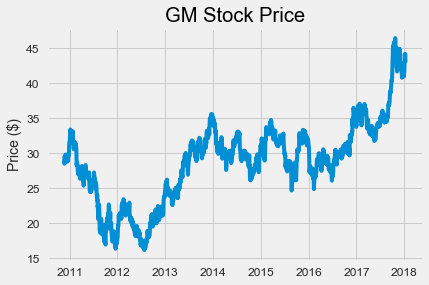

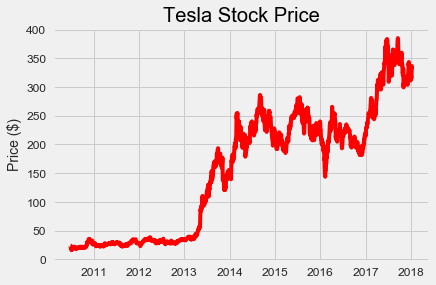

In [4]:
# The adjusted close accounts for stock splits, so that is what we should graph
plt.plot(gm.index, gm['Adj. Close'])
plt.title('GM Stock Price')
plt.ylabel('Price ($)');
plt.show()

plt.plot(tesla.index, tesla['Adj. Close'], 'r')
plt.title('Tesla Stock Price')
plt.ylabel('Price ($)');
plt.show();

In order to compare the companies, we need to compute their market capitalization. Quandl does not provide this data, but we can figure out the market cap ourselves by multiplying the number of shares outstanding times the share price. 

In [5]:
# Yearly average number of shares outstanding for Tesla and GM
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 
                2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}

gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 
                2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010: 1.50e9}

In [6]:
# Create a year column 
tesla['Year'] = tesla.index.year

# Take Dates from index and move to Date column 
tesla.reset_index(level=0, inplace = True)
tesla['cap'] = 0

# Calculate market cap for all years
for i, year in enumerate(tesla['Year']):
    # Retrieve the shares for the year
    shares = tesla_shares.get(year)
    
    # Update the cap column to shares times the price
    tesla.ix[i, 'cap'] = shares * tesla.ix[i, 'Adj. Close']

In [7]:
# Create a year column 
gm['Year'] = gm.index.year

# Take Dates from index and move to Date column 
gm.reset_index(level=0, inplace = True)
gm['cap'] = 0

# Calculate market cap for all years
for i, year in enumerate(gm['Year']):
    # Retrieve the shares for the year
    shares = gm_shares.get(year)
    
    # Update the cap column to shares times the price
    gm.ix[i, 'cap'] = shares * gm.ix[i, 'Adj. Close']

In [8]:
# Merge the two datasets and rename the columns
cars = gm.merge(tesla, how='inner', on='Date')
cars.rename(columns={'cap_x': 'gm_cap', 'cap_y': 'tesla_cap'}, inplace=True)

In [9]:
# Select only the relevant columns
cars = cars.ix[:, ['Date', 'gm_cap', 'tesla_cap']]

# Divide to get market cap in billions of dollars
cars['gm_cap'] = cars['gm_cap'] / 1e9
cars['tesla_cap'] = cars['tesla_cap'] / 1e9

cars.head()

,Date,gm_cap,tesla_cap
0,2010-11-18,43.941453,1.52439
1,2010-11-19,44.031417,1.58049
2,2010-11-22,43.800079,1.70340
3,2010-11-23,42.733352,1.76307
4,2010-11-24,43.028951,1.80897


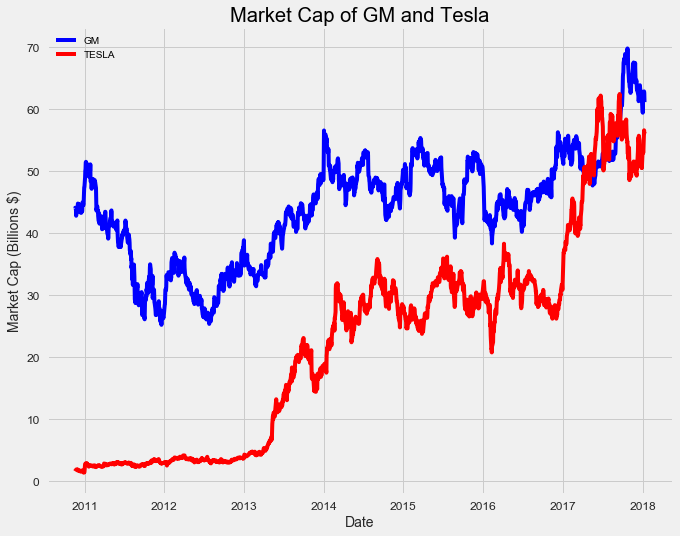

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(cars['Date'], cars['gm_cap'], 'b-', label = 'GM')
plt.plot(cars['Date'], cars['tesla_cap'], 'r-', label = 'TESLA')
plt.xlabel('Date'); plt.ylabel('Market Cap (Billions $)'); plt.title('Market Cap of GM and Tesla')
plt.legend();

Tesla briefly surpassed GM in market cap in 2017. On what dates did this occur?

In [75]:
import numpy as np

# Find the first and last time Tesla was valued higher than GM
first_date = cars.ix[np.min(list(np.where(cars['tesla_cap'] > cars['gm_cap'])[0])), 'Date']
last_date = cars.ix[np.max(list(np.where(cars['tesla_cap'] > cars['gm_cap'])[0])), 'Date']

print("Tesla was valued higher than GM from {} to {}.".format(first_date.date(), last_date.date()))

Tesla was valued higher than GM from 2017-04-10 to 2017-09-21.


During Q2 2017, Tesla [sold](https://en.wikipedia.org/wiki/Tesla,_Inc.#Production_and_sales) 22026 cars while GM [sold](http://gmauthority.com/blog/gm/general-motors-sales-numbers/) 725000. In Q3 2017, Tesla sold 26137 cars and GM sold 808000. In all of 2017, Tesla sold 103084 cars and GM sold 3002237. That means GM was valued less than Tesla in a year during which it sold 29 times more cars than Tesla! Interesting to say the least.

## Prophet Models 

In [91]:
import fbprophet

# Prophet requires columns ds (Date) and y (value)
gm = gm.rename(columns={'Date': 'ds', 'cap': 'y'})
# Make the prophet models and fit on the data
gm_prophet = fbprophet.Prophet()
gm_prophet.fit(gm)

# Repeat for the tesla data
tesla =tesla.rename(columns={'Date': 'ds', 'cap': 'y'})
tesla_prophet = fbprophet.Prophet()
tesla_prophet.fit(tesla);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [92]:
# Make a future dataframe for 2 years and then make predictions
gm_forecast = gm_prophet.make_future_dataframe(periods=365 * 2, freq='D')
gm_forecast = gm_prophet.predict(gm_forecast)

tesla_forecast = tesla_prophet.make_future_dataframe(periods=365*2, freq='D')
tesla_forecast = tesla_prophet.predict(tesla_forecast)

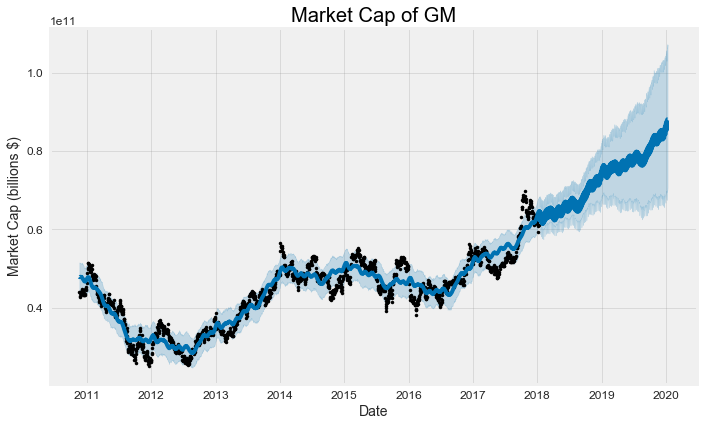

In [93]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)')
plt.title('Market Cap of GM');

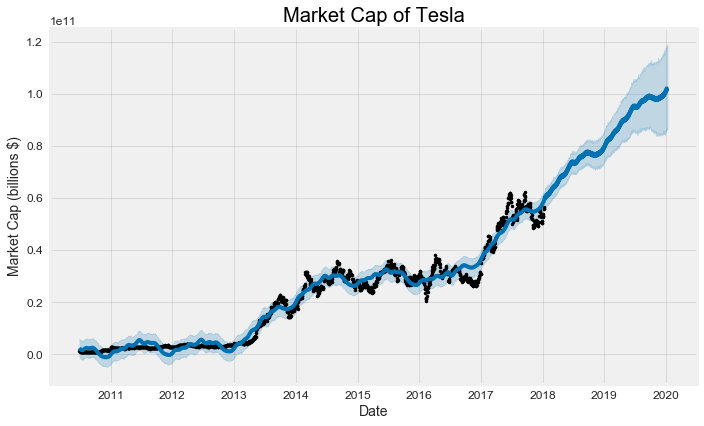

In [94]:
tesla_prophet.plot(tesla_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)')
plt.title('Market Cap of Tesla');

In [95]:
gm_names = ['gm_%s' % column for column in gm_forecast.columns]
tesla_names = ['tesla_%s' % column for column in tesla_forecast.columns]

# Dataframes to merge
merge_gm_forecast = gm_forecast.copy()
merge_tesla_forecast = tesla_forecast.copy()

# Rename the columns
merge_gm_forecast.columns = gm_names
merge_tesla_forecast.columns = tesla_names

In [96]:
# Merge the two datasets
forecast = pd.merge(merge_gm_forecast, merge_tesla_forecast, how = 'inner', left_on = 'gm_ds', right_on = 'tesla_ds')

# Rename date column
forecast = forecast.rename(columns={'gm_ds': 'Date'}).drop('tesla_ds', axis=1)
forecast.head()

,Date,gm_trend,gm_trend_lower,gm_trend_upper,gm_yhat_lower,gm_yhat_upper,gm_seasonal,gm_seasonal_lower,gm_seasonal_upper,gm_seasonalities,...,tesla_seasonalities,tesla_seasonalities_lower,tesla_seasonalities_upper,tesla_weekly,tesla_weekly_lower,tesla_weekly_upper,tesla_yearly,tesla_yearly_lower,tesla_yearly_upper,tesla_yhat
0,2010-11-18,4.690657e+10,4.690657e+10,4.690657e+10,4.421426e+10,5.160562e+10,9.743418e+08,9.743418e+08,9.743418e+08,9.743418e+08,...,-3.072751e+09,-3.072751e+09,-3.072751e+09,-2.303958e+08,-2.303958e+08,-2.303958e+08,-2.842355e+09,-2.842355e+09,-2.842355e+09,-9.832926e+08
1,2010-11-19,4.686558e+10,4.686558e+10,4.686558e+10,4.435799e+10,5.156007e+10,9.677757e+08,9.677757e+08,9.677757e+08,9.677757e+08,...,-3.125156e+09,-3.125156e+09,-3.125156e+09,-2.536546e+08,-2.536546e+08,-2.536546e+08,-2.871501e+09,-2.871501e+09,-2.871501e+09,-1.022252e+09
2,2010-11-22,4.674259e+10,4.674259e+10,4.674259e+10,4.418948e+10,5.153134e+10,1.146594e+09,1.146594e+09,1.146594e+09,1.146594e+09,...,-3.127887e+09,-3.127887e+09,-3.127887e+09,-1.785246e+08,-1.785246e+08,-1.785246e+08,-2.949362e+09,-2.949362e+09,-2.949362e+09,-9.846470e+08
3,2010-11-23,4.670159e+10,4.670159e+10,4.670159e+10,4.463994e+10,5.148860e+10,1.157905e+09,1.157905e+09,1.157905e+09,1.157905e+09,...,-3.158661e+09,-3.158661e+09,-3.158661e+09,-1.859951e+08,-1.859951e+08,-1.859951e+08,-2.972665e+09,-2.972665e+09,-2.972665e+09,-1.001976e+09
4,2010-11-24,4.666060e+10,4.666060e+10,4.666060e+10,4.431184e+10,5.152190e+10,1.254984e+09,1.254984e+09,1.254984e+09,1.254984e+09,...,-3.181951e+09,-3.181951e+09,-3.181951e+09,-1.870465e+08,-1.870465e+08,-1.870465e+08,-2.994904e+09,-2.994904e+09,-2.994904e+09,-1.011820e+09


In [97]:
# Rescale values to be in billions of dollars
forecast.ix[:, 1:] = forecast.ix[:, 1:] / 1e9

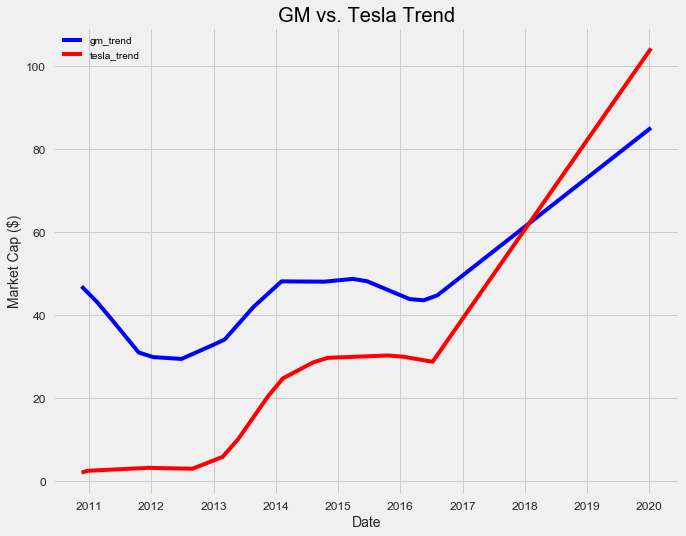

In [98]:
plt.figure(figsize=(10, 8))
plt.plot(forecast['Date'], forecast['gm_trend'], 'b-')
plt.plot(forecast['Date'], forecast['tesla_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Market Cap ($)')
plt.title('GM vs. Tesla Trend'); 

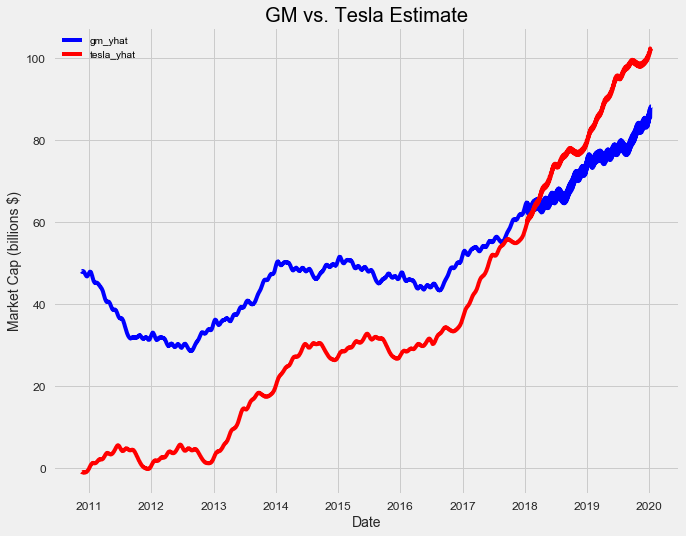

In [99]:
plt.figure(figsize=(10, 8))
plt.plot(forecast['Date'], forecast['gm_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['tesla_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Market Cap (billions $)')
plt.title('GM vs. Tesla Estimate'); 

In [100]:
# Only keep years 2011 onwards
forecast = forecast[forecast['Date'] > '2010-12-31']

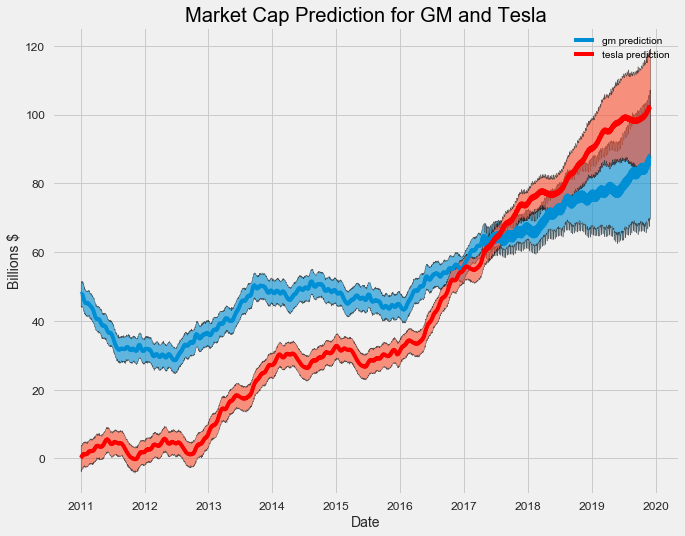

In [101]:
xvalues = list(range(len(forecast['Date'])))

fig, ax = plt.subplots(1, 1, figsize=(10, 8));
ax.plot(xvalues, forecast['gm_yhat'], label = 'gm prediction');
ax.fill_between(xvalues, forecast['gm_yhat_upper'], forecast['gm_yhat_lower'], alpha=0.6, edgecolor = 'k');
ax.plot(xvalues, forecast['tesla_yhat'], 'r', label = 'tesla prediction');
ax.fill_between(xvalues, forecast['tesla_yhat_upper'], forecast['tesla_yhat_lower'], alpha=0.6, edgecolor = 'k');
ax.set_xticks(ticks = list(range(0, 2600, 280)));
ax.set_xticklabels(labels = list(range(2011, 2021, 1)));
plt.legend();
plt.xlabel('Date'); plt.ylabel('Billions $'); plt.title('Market Cap Prediction for GM and Tesla');



Now, we can use the Prophet Models to inspect different trends in the data. 

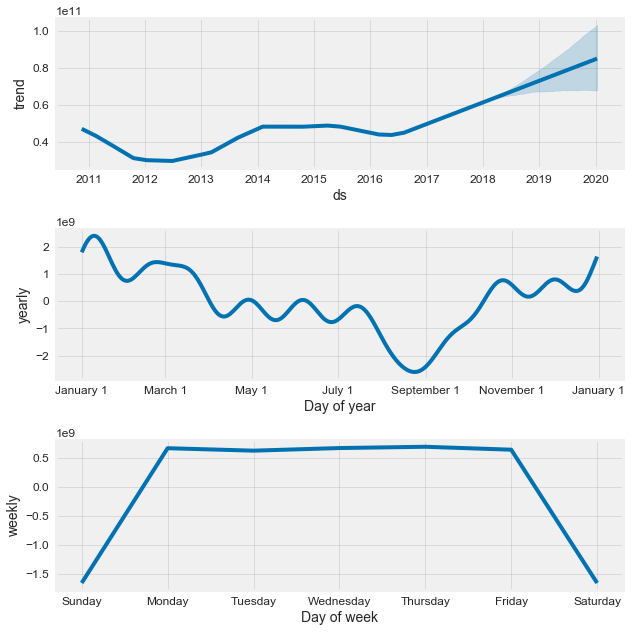

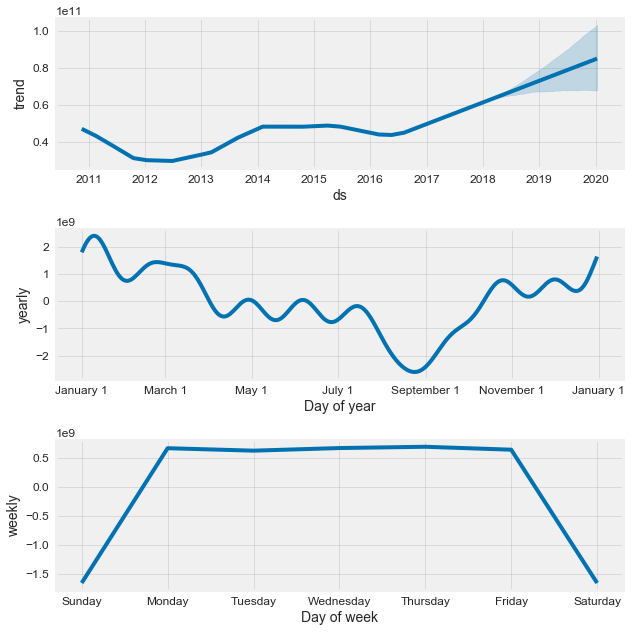

In [102]:
gm_prophet.plot_components(gm_forecast)

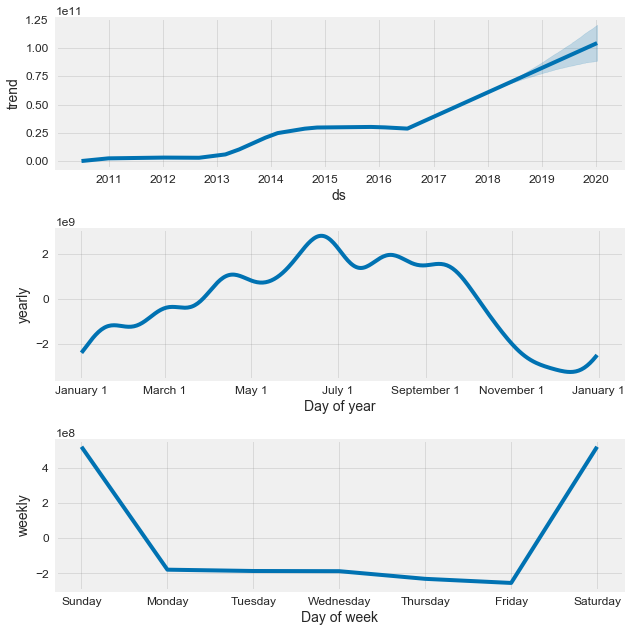

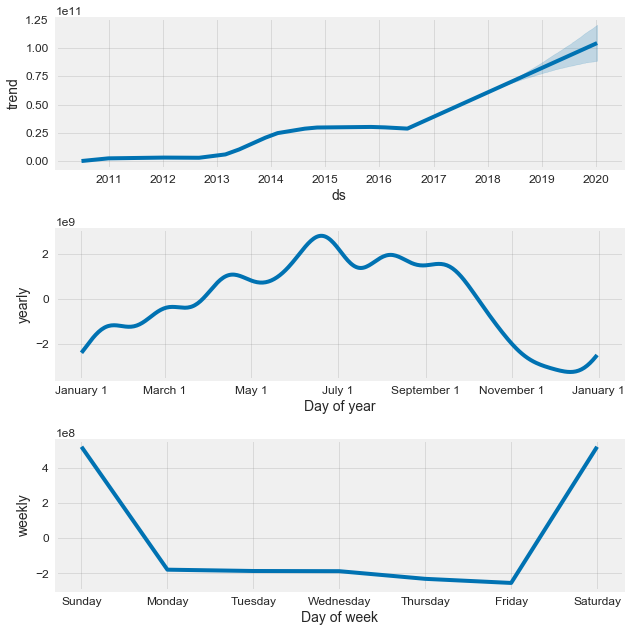

In [103]:
tesla_prophet.plot_components(tesla_forecast)

These graphs show that Tesla tends to increase during the summer, and decrease during the winter, while GM plummets during the summer and increases during the winter. We could compare GM sales with these graphs to see if there is any correlation.

In [211]:
# Read in the sales data
gm_sales = pd.read_csv('data/gm_sales.csv')
gm_sales.head(5)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,2017,195909,237388,256224,244406,237364,243151,226107,275552,279397,252813,245387,308539,3002237
1,2016,203745,227825,252128,259557,240449,255209,267258,256429,249795,258626,252644,319108,3042773
2,2015,202786,231378,249875,269055,293097,259346,272512,270480,251310,262993,229296,290230,3082358
3,2014,171486,222104,256047,254076,284694,267461,256160,272422,223437,226819,225818,274483,2935007
4,2013,194699,224314,245950,237646,252894,264843,234071,275847,187195,226402,212060,230157,2786078


In [212]:
# Melt the sales data and rename columns
gm_sales = gm_sales.melt(id_vars='Year', var_name = 'Month', value_name = 'Sales')
gm_sales.head(8)

,Year,Month,Sales
0,2017,Jan,195909
1,2016,Jan,203745
2,2015,Jan,202786
3,2014,Jan,171486
4,2013,Jan,194699
5,2012,Jan,167962
6,2011,Jan,178896
7,2010,Jan,145098


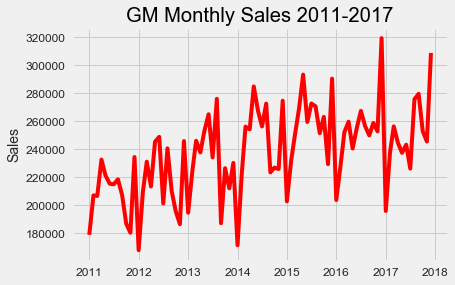

In [213]:
# Format the data for plotting
gm_sales = gm_sales[gm_sales['Month'] != 'Total']
gm_sales = gm_sales[gm_sales['Year'] > 2010]
gm_sales['Date'] = ['-'.join([str(year), month]) for year, month in zip(gm_sales['Year'], gm_sales['Month'])]
gm_sales['Date'] = pd.to_datetime(gm_sales['Date'], format = "%Y-%b")
gm_sales.sort_values(by = 'Date', inplace=True)
gm_sales['Month'] = [date.month for date in gm_sales['Date']]

# Plot the sales over the period
plt.plot(gm_sales['Date'], gm_sales['Sales'], 'r');
plt.title('GM Monthly Sales 2011-2017'); plt.ylabel('Sales');

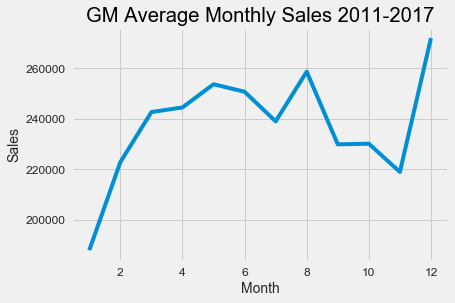

In [214]:
gm_sales_grouped = gm_sales.groupby('Month').mean()
plt.plot(list(range(1, 13)), gm_sales_grouped['Sales']);
plt.xlabel('Month'); plt.ylabel('Sales'); plt.title('GM Average Monthly Sales 2011-2017');

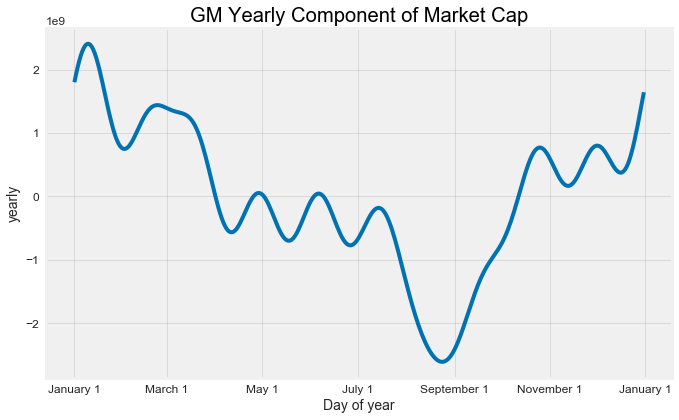

In [215]:
gm_prophet.plot_yearly(); plt.title('GM Yearly Component of Market Cap');

# Assessing Accuracy of Predictions

We can also make testable predictions by restricting our model to a subset of the data, and then using the forecasted values to see how correct our model is. We will restrict data up until the end of 2016, and then try to make predictions for 2017.

In [216]:
gm.head()

,ds,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,y
0,2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0,2010,4.394145e+10
1,2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0,2010,4.403142e+10
2,2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0,2010,4.380008e+10
3,2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0,2010,4.273335e+10
4,2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0,2010,4.302895e+10


In [220]:
# Create a new dataframe with the relevant information
gm_stocks = gm[['ds', 'Year', 'Adj. Close']]
gm_stocks.rename(columns={'Adj. Close': 'y'}, inplace=True)

# Training and testing data
gm_stocks_train = gm_stocks[gm_stocks['Year'] < 2017]
gm_stocks_test = gm_stocks[gm_stocks['Year'] > 2016]

# Create a new model 
gm_stock_prophet = fbprophet.Prophet()

# Train the model
gm_stock_prophet.fit(gm_stocks_train)
gm_stock_forecast = gm_stock_prophet.make_future_dataframe(periods = gm_stocks_test.shape[0], freq = 'D')

# Make forecasts
gm_stock_forecast = gm_stock_prophet.predict(gm_stock_forecast)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


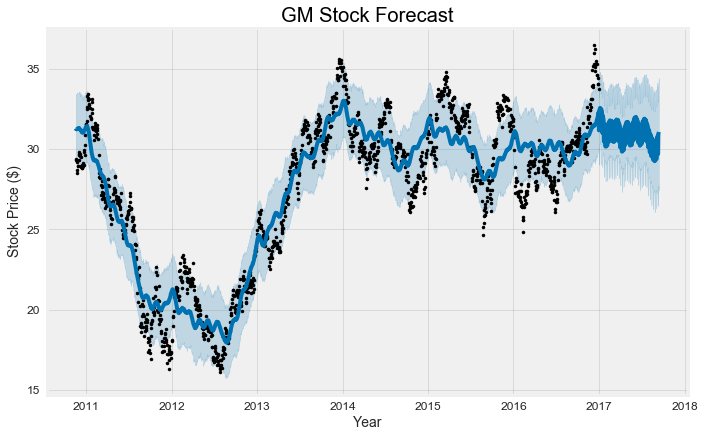

In [222]:
gm_stock_prophet.plot(gm_stock_forecast);
plt.title('GM Stock Forecast'); plt.ylabel('Stock Price ($)'); plt.xlabel('Year');

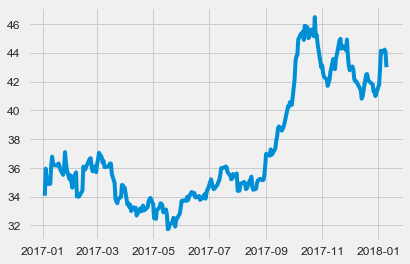

In [224]:
plt.plot(gm_stocks_test['ds'], gm_stocks_test['y'])

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


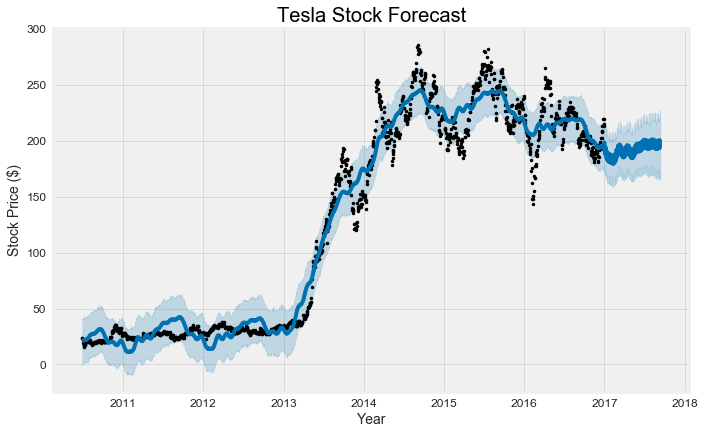

In [226]:
# Create a new dataframe with the relevant information
tesla_stocks = tesla[['ds', 'Year', 'Adj. Close']]
tesla_stocks.rename(columns={'Adj. Close': 'y'}, inplace=True)

# Training and testing data
tesla_stocks_train = tesla_stocks[tesla_stocks['Year'] < 2017]
tesla_stocks_test = tesla_stocks[tesla_stocks['Year'] > 2016]

# Create a new model 
tesla_stock_prophet = fbprophet.Prophet()

# Train the model
tesla_stock_prophet.fit(tesla_stocks_train)
tesla_stock_forecast = tesla_stock_prophet.make_future_dataframe(periods = tesla_stocks_test.shape[0], freq = 'D')

# Make forecasts
tesla_stock_forecast = tesla_stock_prophet.predict(tesla_stock_forecast)

tesla_stock_prophet.plot(tesla_stock_forecast);
plt.title('Tesla Stock Forecast'); plt.ylabel('Stock Price ($)'); plt.xlabel('Year');

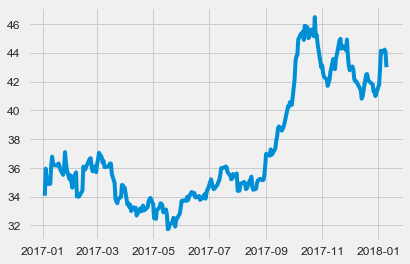

In [227]:
plt.plot(gm_stocks_test['ds'], gm_stocks_test['y'])

In [366]:
def stock_predictor(ticker='TSLA'):
    try:
        stock = quandl.get('WIKI/%s' % ticker)
    except Exception as e:
        print('Invalid Stock Ticker')
        print(e)
        return
    
    # Change the index to a Date column
    stock_clean = stock.reset_index()[['Date', 'Adj. Close']]
    # Create a year column
    stock_clean['Year'] = [date.year for date in stock_clean['Date']]
    
    # Training and Testing Sets
    stock_train = stock_clean[stock_clean['Year'] < 2017].rename(columns={'Date': 'ds', 'Adj. Close': 'y'})
    stock_test = stock_clean[stock_clean['Year'] > 2016]
    
    # Create the prophet model and fit on training set
    stock_prophet = fbprophet.Prophet()
    stock_prophet.fit(stock_train)
    
    # Make forecasts for entire length of test set + one week
    stock_forecast = stock_prophet.make_future_dataframe(periods=400, freq = 'D')
    stock_forecast = stock_prophet.predict(stock_forecast)
    
    # Plot the entire series
    stock_prophet.plot(stock_forecast); plt.xlabel('Year'); plt.ylabel('Price (US $)');
    plt.title('%s Stock Price and Predictions' % ticker)
    
    
    # Dataframe for predictions and test values
    results = stock_forecast[['ds', 'yhat', 'trend', 'seasonal', 'seasonalities', 'weekly', 'yearly', 'yhat_upper', 'yhat_lower']]
    results = pd.merge(results, stock_test[['Date', 'Adj. Close']], left_on='ds', right_on='Date', how='right')
    
    all_pred = results[['trend', 'seasonal', 'seasonalities', 'weekly', 'yearly']]
    # results['yhat'] = list(np.sum(np.array(all_pred), axis=1))
    
    
    xvalues = list(range(len(results['Date'])))

    xlabels = list(range(13))
    xlabels.append(1)
    
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 8));
    ax.plot(xvalues, results['Adj. Close'], 'b-', label = 'Actual');
    ax.plot(xvalues, results['yhat'], 'r*', label = 'Predicted');
    ax.fill_between(xvalues, results['yhat_upper'], results['yhat_lower'], alpha=0.6, edgecolor = 'k');
    ax.set_xticks(ticks = list(range(0, max(xvalues), int(max(xvalues) / 12))));
    ax.set_xticklabels(labels = xlabels);
    plt.legend();
    plt.xlabel('2017'); plt.ylabel('Billions $'); plt.title('Market Cap Prediction for GM and Tesla');
    plt.show()
                  
    # Columns of daily changes
    results['pred_diff'] = results['yhat'].diff()
    results['actual_diff'] = results['Adj. Close'].diff()
    
    # Whether the prediction was right or wrong
    results['pred_right'] = np.array((np.sign(results['pred_diff']) == np.sign(results['actual_diff'])).astype('int')).astype(int)
    
    plt.figure(figsize = (10, 8))
    plt.plot(results['Date'], results['actual_diff'], 'bo-', label = 'Actual')
    plt.plot(results['Date'], results['pred_diff'], 'r*-', label = 'Predicted')
    plt.legend(); plt.xlabel('Date'); plt.ylabel('Change (US $)'); plt.title('Actual vs. Predicted Daily Change');
    plt.show();
    
    # Percentage of time direction lined up
    direction_accuracy = np.mean(results['pred_right'])
                                         
    # Performance metrics
    errors = abs(results['yhat'] - results['Adj. Close'])
    mean_error = np.mean(errors)
    mape = np.mean(errors / results['Adj. Close'])
    accuracy = 100 - (100 * mape)
    
    print('Actual and Predicted Difference Aligned {:0.2f}%.'.format(direction_accuracy * 100))
    
    performance = {'error': mean_error, 'accuracy': accuracy, 'dir_acc': direction_accuracy, 'predictions': results}
    return performance

In [367]:
max_date = pd.datetime(2018, 2, 1)
min_date = pd.datetime(2017, 1, 1)
xlabels = []
for date in list(pd.date_range(start = min_date, end = max_date, freq = 'm')):
    xlabels.append(str(date.month))
    
xlabels

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '1']

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


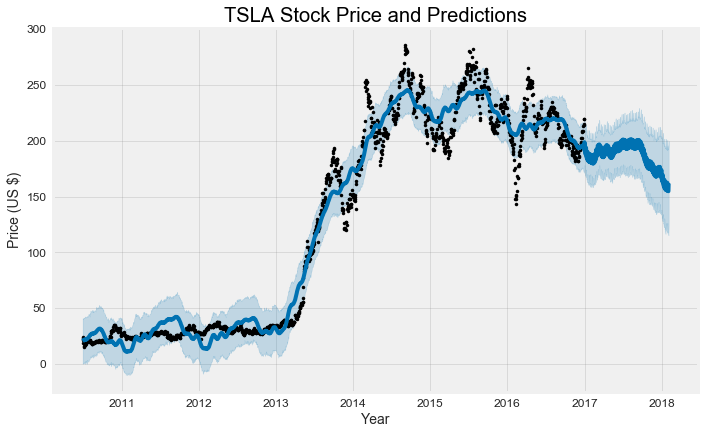

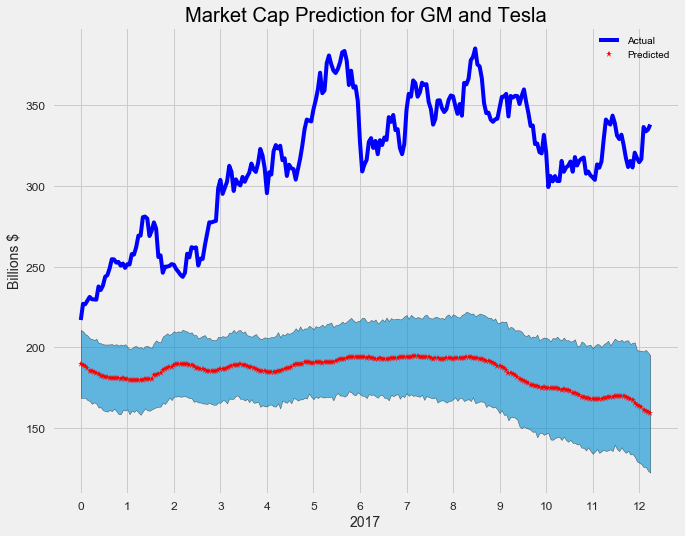

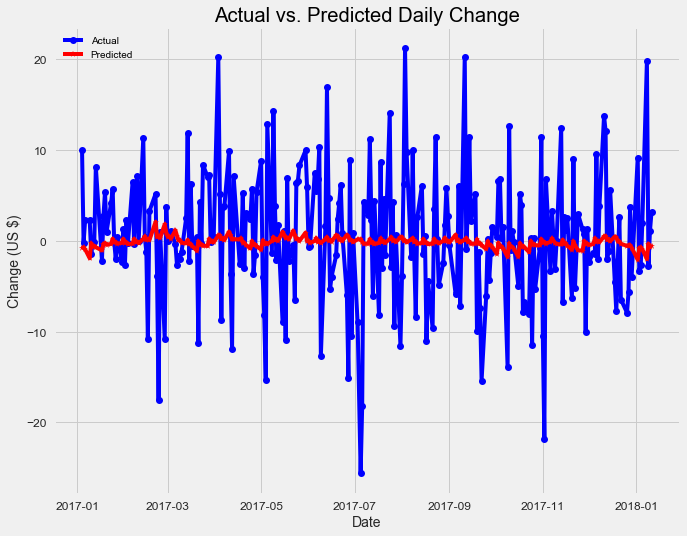

Actual and Predicted Difference Aligned 48.84%.


In [368]:
results = stock_predictor('TSLA')

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


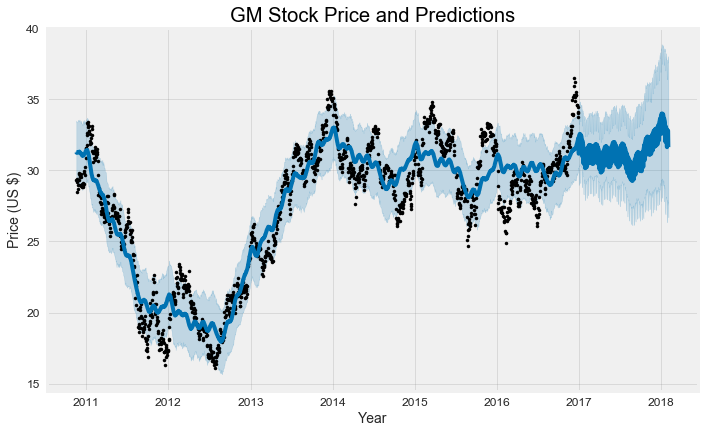

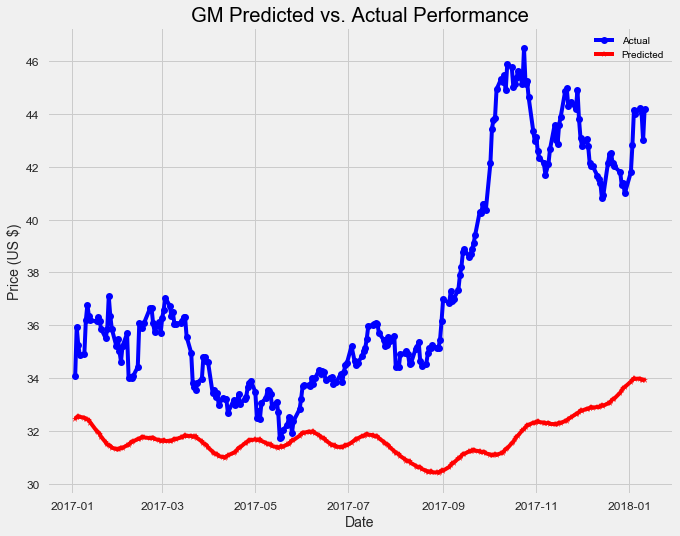

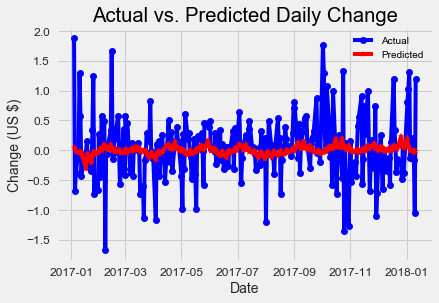

Actual and Predicted Difference Aligned 52.71%.


In [335]:
results = stock_predictor('GM')

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


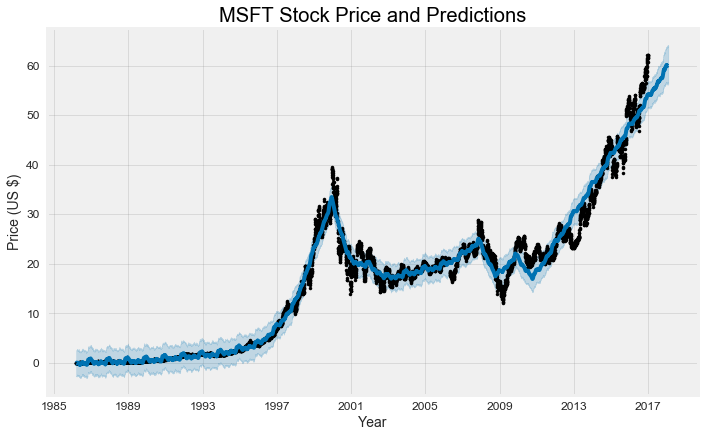

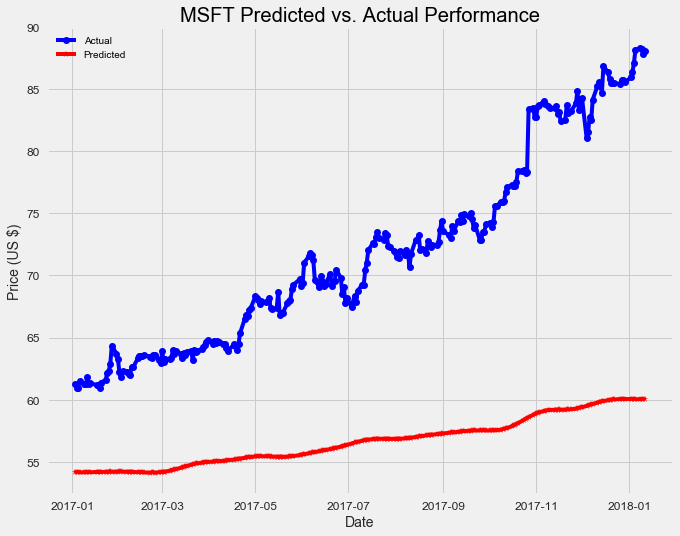

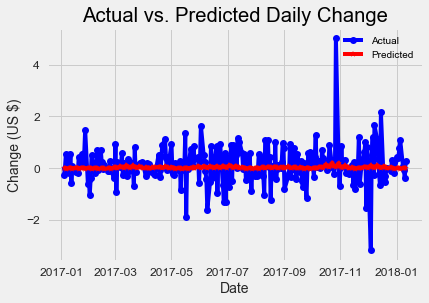

Actual and Predicted Difference Aligned 49.61%.


In [336]:
results = stock_predictor('MSFT')

In [325]:
tesla = quandl.get('WIKI/TSLA')
tesla = tesla.reset_index()
tesla = tesla.rename(columns={'Date': 'ds', 'Adj. Close': 'y'})
tesla = tesla[['ds', 'y']]

prophet = fbprophet.Prophet()
prophet.fit(tesla)
future = prophet.make_future_dataframe(periods=365)
future = prophet.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [328]:
future['combination'] = future['trend'] + future['seasonal'] + future['weekly'] + future['yearly'] + future['seasonalities']
print(future[['combination', 'yhat']].head())

   combination       yhat
0    57.071956  27.681139
1    55.840545  27.337270
2    53.741200  26.704090
3    51.874192  26.148355
4    47.827763  25.065950


In [308]:
results['predictions']

,ds,yhat,trend,seasonal,seasonalities,weekly,yearly,Date,Adj. Close,pred_diff,actual_diff,pred_right
0,2017-01-03,55.276103,53.598276,0.559275,0.559275,-0.007371,0.566646,2017-01-03,61.219142,NaN,NaN,0
1,2017-01-04,55.268799,53.614393,0.551469,0.551469,0.002420,0.549049,2017-01-04,60.945231,-0.007303,-0.273911,1
2,2017-01-05,55.257788,53.630509,0.542426,0.542426,0.010764,0.531662,2017-01-05,60.945231,-0.011011,0.000000,0
3,2017-01-06,55.145782,53.646626,0.499719,0.499719,-0.014854,0.514572,2017-01-06,61.473488,-0.112005,0.528257,0
4,2017-01-09,55.054914,53.694976,0.453313,0.453313,-0.012318,0.465631,2017-01-09,61.277837,-0.090868,-0.195651,1
5,2017-01-10,55.039537,53.711092,0.442815,0.442815,-0.007371,0.450185,2017-01-10,61.258272,-0.015377,-0.019565,1
6,2017-01-11,55.040008,53.727209,0.437600,0.437600,0.002420,0.435179,2017-01-11,61.815877,0.000471,0.557605,1
7,2017-01-12,55.037404,53.743325,0.431359,0.431359,0.010764,0.420596,2017-01-12,61.248489,-0.002604,-0.567387,1
8,2017-01-13,54.934100,53.759442,0.391553,0.391553,-0.014854,0.406406,2017-01-13,61.336532,-0.103303,0.088043,0
9,2017-01-17,54.860093,53.823908,0.345395,0.345395,-0.007371,0.352766,2017-01-17,61.170229,-0.074008,-0.166303,1


### US vs. China Gross Domestic Product

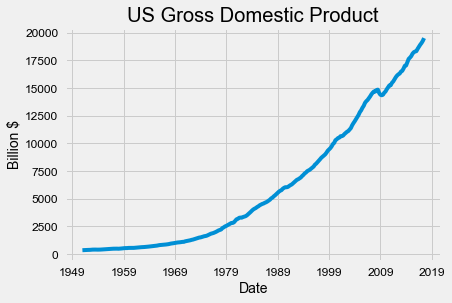

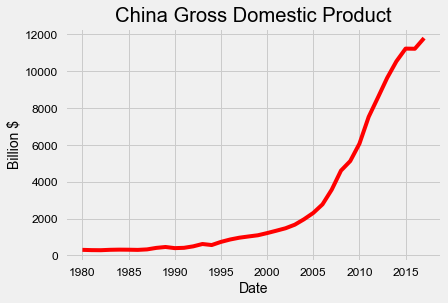

In [133]:
# My personal api key, use your own
quandl.ApiConfig.api_key = 'rFsSehe51RLzREtYhLfo'

# Get data from quandl for US and China GDP
us_gdp = quandl.get('FRED/GDP', collapse='quarterly', start_date = '1950-12-31', end_date='2017-12-31')
china_gdp = quandl.get('ODA/CHN_NGDPD', collapse='yearly', start_date = '1950-12-31', end_date='2017-12-31')

us_gdp.plot(title = 'US Gross Domestic Product', legend=None);
plt.ylabel('Billion $'); 
china_gdp.plot(title = 'China Gross Domestic Product', color = 'r', legend=None);
plt.ylabel('Billion $');

In [134]:
# Change index to date column
us_gdp = us_gdp.reset_index(level=0)
us_gdp.head(5)

,Date,Value
0,1951-03-31,336.372
1,1951-06-30,344.455
2,1951-09-30,351.774
3,1951-12-31,356.579
4,1952-03-31,360.195


In [135]:
china_gdp = china_gdp.reset_index(level=0)
china_gdp.head(5)

,Date,Value
0,1980-12-31,305.350
1,1981-12-31,290.724
2,1982-12-31,286.729
3,1983-12-31,307.683
4,1984-12-31,316.666


In [136]:
# Merge the two gdp data frames and rename columns
gdp = us_gdp.merge(china_gdp, on = 'Date', how = 'left').rename(columns={'Value_x': 'US', 'Value_y': 'China'})
gdp.head(5)

,Date,US,China
0,1951-03-31,336.372,NaN
1,1951-06-30,344.455,NaN
2,1951-09-30,351.774,NaN
3,1951-12-31,356.579,NaN
4,1952-03-31,360.195,NaN


In [137]:
round(gdp.describe(), 2)

,US,China
count,267.00,37.00
mean,6058.74,2739.24
std,5811.22,3484.69
min,336.37,286.73
25%,874.91,411.92
50%,4015.00,1032.58
75%,10490.20,3571.45
max,19500.60,11226.19


In [138]:
# Fill in missing China observations using backward fill
gdp = gdp.fillna(method='bfill')

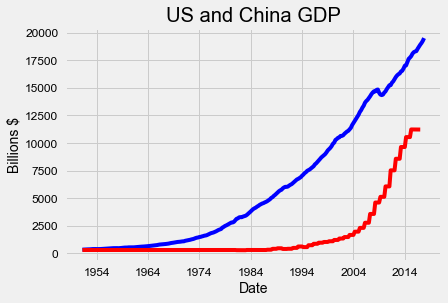

In [142]:
plt.plot(gdp['Date'], gdp['US'], label = 'US', color =  'b')
plt.plot(gdp['Date'], gdp['China'], label = 'China', color = 'r')
plt.ylabel('Billions $'); plt.title('US and China GDP'); plt.xlabel('Date');

# Using Prophet

In [172]:
# Create a prophet object for each dataframe
us_prophet = fbprophet.Prophet(growth='linear', n_changepoints = 5)
china_prophet = fbprophet.Prophet(growth='linear', n_changepoints = 5)

# Prophet needs dataframes with a ds (date) and y (variable) column
# Use pandas rename functionality (format is dictionary with {'old': 'new'})
us_gdp = us_gdp.rename(columns={'Date': 'ds', 'Value': 'y'})
china_gdp = china_gdp.rename(columns={'Date': 'ds', 'Value': 'y'})

In [173]:
us_prophet.fit(us_gdp);
china_prophet.fit(china_gdp);

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [171]:
us_prophet.changepoints

43    1961-12-31
85    1972-06-30
128   1983-03-31
170   1993-09-30
213   2004-06-30
Name: ds, dtype: datetime64[ns]

The prophet object only selects changepoints from the first 80% of the data which is why the recent recession does not appear. We can try and correlate the identified changepoints with actual recessions.

In [187]:
recessions = pd.read_csv('data/recessions.csv', encoding='latin')

In [189]:
recessions[6:]

,name,time,duration,max_unemp,gdp_decline
6,Recession of 196061,Apr 1960  Feb 1961,10 months,7%,2%
7,Recession of 196970,Dec 1969 Nov 1970,11 months,6%,1%
8,197375 recession,Nov 1973  Mar 1975,1 year 4 months,9%,3%
9,1980 recession,JanJuly 1980,6 months,8%,2%
10,19811982 recession,July 1981  Nov 1982,1 year 4 months,11%,3%
11,Early 1990s recession,July 1990  Mar 1991,8 months,8%,1%
12,Early 2000s recession,Mar 2001Nov 2001,8 months,6%,0%
13,Great Recession,Dec 2007  June 2009,1 year 6 months,10%,5%


In [203]:
# Make a future dataframe with 50 years of observations 
# US dataframe and predictions
us_forecast = us_prophet.make_future_dataframe(periods = 4 * 50, freq = '4 M')
us_forecast = us_prophet.predict(us_forecast)

# China dataframe and predictions
china_forecast = china_prophet.make_future_dataframe(periods = 50, freq = 'Y')
china_forecast = china_prophet.predict(china_forecast)

In [204]:
us_forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
0,1951-03-31,415.792254,415.792254,415.792254,50.608549,514.646193,-130.900522,-130.900522,-130.900522,-130.900522,-130.900522,-130.900522,-130.900522,-130.900522,-130.900522,284.891732
1,1951-06-30,422.166086,422.166086,422.166086,67.198978,536.816708,-121.473574,-121.473574,-121.473574,-121.473574,-121.473574,-121.473574,-121.473574,-121.473574,-121.473574,300.692511
2,1951-09-30,428.609960,428.609960,428.609960,63.435320,549.964500,-109.086353,-109.086353,-109.086353,-109.086353,-109.086353,-109.086353,-109.086353,-109.086353,-109.086353,319.523607
3,1951-12-31,435.053834,435.053834,435.053834,86.671408,553.850031,-104.117204,-104.117204,-104.117204,-104.117204,-104.117204,-104.117204,-104.117204,-104.117204,-104.117204,330.936630
4,1952-03-31,441.427666,441.427666,441.427666,109.491987,592.476904,-95.274141,-95.274141,-95.274141,-95.274141,-95.274141,-95.274141,-95.274141,-95.274141,-95.274141,346.153525
5,1952-06-30,447.801498,447.801498,447.801498,106.355327,594.686112,-82.761762,-82.761762,-82.761762,-82.761762,-82.761762,-82.761762,-82.761762,-82.761762,-82.761762,365.039736
6,1952-09-30,454.245372,454.245372,454.245372,132.917564,604.882354,-86.534490,-86.534490,-86.534490,-86.534490,-86.534490,-86.534490,-86.534490,-86.534490,-86.534490,367.710882
7,1952-12-31,460.689247,460.689247,460.689247,98.942523,593.975723,-110.754656,-110.754656,-110.754656,-110.754656,-110.754656,-110.754656,-110.754656,-110.754656,-110.754656,349.934591
8,1953-03-31,466.993036,466.993036,466.993036,119.123660,587.251007,-107.259287,-107.259287,-107.259287,-107.259287,-107.259287,-107.259287,-107.259287,-107.259287,-107.259287,359.733749
9,1953-06-30,473.366869,473.366869,473.366869,141.426243,617.435223,-95.854249,-95.854249,-95.854249,-95.854249,-95.854249,-95.854249,-95.854249,-95.854249,-95.854249,377.512620


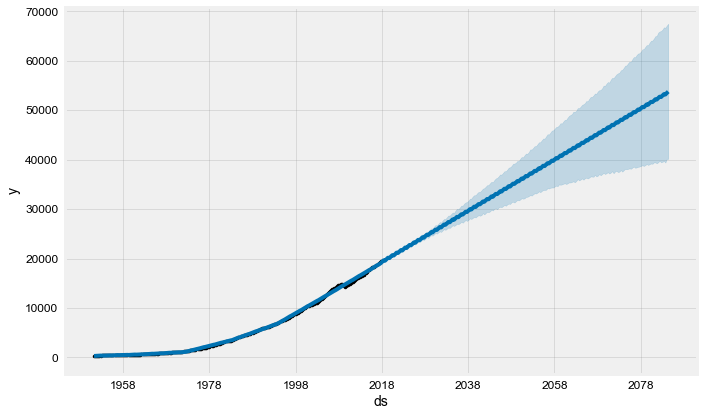

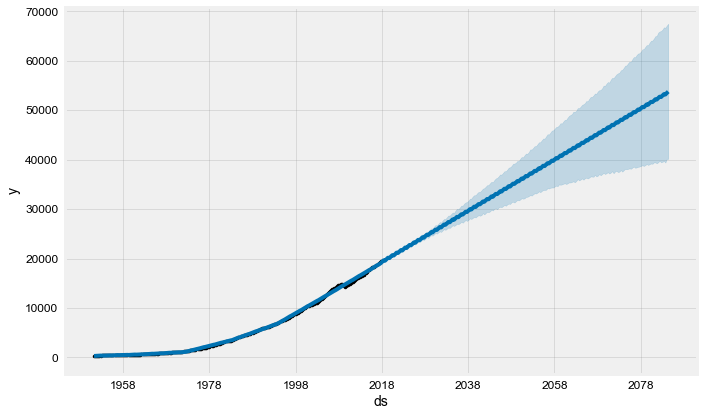

In [209]:
us_prophet.plot(us_forecast)

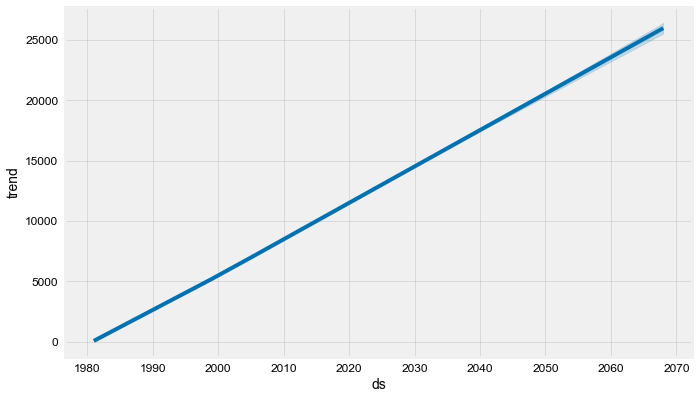

In [208]:
china_prophet.plot_forecast_component(china_forecast, 'trend')

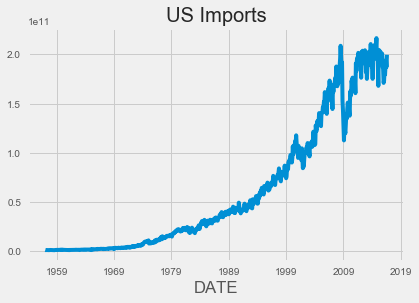

In [78]:
us_imports.plot(title = 'US Imports', legend = None)

In [67]:
china_gdp.shape

(38, 1)

In [68]:
us_gdp.shape

(267, 1)

In [61]:
print('Days between observations:', (gdp.index[1] - gdp.index[0]).days)

Days between observations: 91


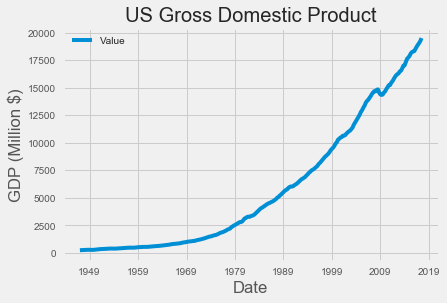

In [65]:
gdp.plot(title = 'US Gross Domestic Product', label = 'US');
plt.ylabel('GDP (Million $)'); 

### US Imports vs Chinese Exports

In [16]:
cat = quandl.get('EOD/CAT')

In [17]:
cat.shape

(14104, 12)

In [18]:
cat.head(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1962-01-02,38.50,38.87,38.12,38.50,13600.0,0.0,1.0,0.547461,0.552723,0.542058,0.547461,163200.0
1962-01-03,38.50,38.87,38.12,38.87,12933.0,0.0,1.0,0.542250,0.547461,0.536898,0.547461,155196.0
1962-01-04,39.75,41.00,39.75,39.88,29600.0,0.0,1.0,0.563279,0.580992,0.563279,0.565121,355200.0
1962-01-05,39.88,40.75,39.75,40.25,13600.0,0.0,1.0,0.559926,0.572141,0.558101,0.565121,163200.0
1962-01-08,40.25,40.87,40.00,40.50,16933.0,0.0,1.0,0.570408,0.579195,0.566866,0.573951,203196.0


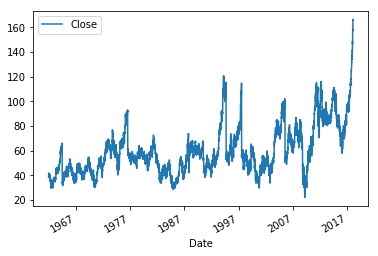

In [21]:
cat.plot(cat.index, 'Close')

In [24]:
micro = quandl.get('EOD/MSFT')

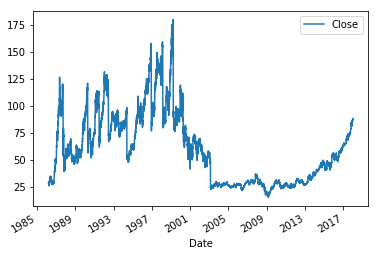

In [25]:
micro.plot(micro.index, 'Close')

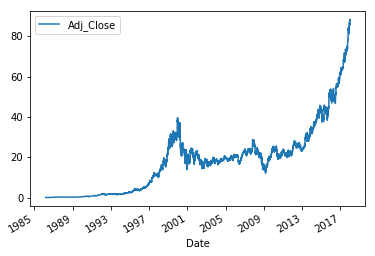

In [32]:
micro.plot(micro.index, 'Adj_Close')

In [29]:
micro[micro['Split'] > 1.0]

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1987-09-21,53.50,57.25,53.00,53.50,297044.0,0.0,2.0,0.247323,0.264658,0.245011,0.247323,42774336.0
1990-04-16,61.00,61.75,60.13,60.75,274089.0,0.0,2.0,0.563988,0.570923,0.555945,0.561677,19734408.0
1991-06-27,67.75,68.25,66.75,68.00,784844.0,0.0,1.5,0.939595,0.946530,0.925727,0.943063,37672512.0
1992-06-15,75.00,78.00,75.00,75.75,1144600.0,0.0,1.5,1.560214,1.622622,1.560214,1.575816,36627200.0
1994-05-23,49.00,51.00,48.50,50.56,2342100.0,0.0,2.0,2.038679,2.121891,2.017877,2.103584,37473600.0
1996-12-09,78.37,81.87,78.00,81.75,5919900.0,0.0,2.0,6.521278,6.812518,6.490489,6.802532,47359200.0
1998-02-23,80.94,81.69,79.37,81.62,15100450.0,0.0,2.0,13.470262,13.595079,13.208978,13.583429,60401800.0
1999-03-29,90.12,92.62,87.87,92.37,19944250.0,0.0,2.0,29.996046,30.828160,29.247144,30.744949,39888500.0
2003-02-18,24.62,24.99,24.40,24.96,28707750.0,0.0,2.0,16.389318,16.635624,16.242866,16.615653,28707750.0


In [43]:
prophet = fbprophet.Prophet(growth = 'linear')

In [ ]:
micro_model.fit